# Selecting the best model for predicting the selling price

### Importing the standard libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [119]:
dataset = pd.read_csv('../assets/car-details-for-ml.csv')

dataset.head()

,year,km_driven,fuel,transmission,seller_type,owner,seats,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,selling_price
0,2014,145500,0,0,1,0,5.0,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,450000
1,2014,120000,0,0,1,2,5.0,21.14,1498,103.52,...,0,0,0,0,1,0,0,0,0,370000
2,2006,140000,1,0,1,3,5.0,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,158000
3,2010,127000,0,0,1,0,5.0,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,225000
4,2007,120000,1,0,1,0,5.0,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,130000


In [120]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting data to train and test sets

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Defining methods for helping to evaluate the models

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2 (R-squared) score = Statistical measure of how close the predicted data are to the actual data.
# Mean Absolute Error (MAE) = The mean value of all errors, positive and negative (absolute value)
# Root Mean Squared Error (RMSE) = The errors are squared and then the mean value is found. The root of the calculated mean value is taken.

labels = ['Model', 'R2', 'MAE', 'RMSE']
results = []

def model_evaluation(model: str, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    results.append([model, r2, mae, rmse])
    return [model, r2, mae, rmse]

In [123]:
# Plots n predictions and actual values against each other

def plot_results_graph(model: str, y_test, y_pred, amount: int):
    plt.figure(figsize=(20, 8))
    plt.plot(y_test[:amount], "b")
    plt.plot(y_pred[:amount], "g--")
    plt.title(model)
    plt.ylabel('Price')
    plt.legend(['Actual value','Predicted value'])
    plt.show()

## Linear Regression

We will start out by testing the Linear Regression model, as a lot of the features seemed to have a linear relation with one another.

In [124]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Predicting the selling price from the test set**

In [125]:
y_pred = lin_reg.predict(X_test)

np.set_printoptions(precision=2)
pred_vs_actual = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

print(pred_vs_actual[:8])

[[ 909141.7   910000.  ]
 [ 236498.34  259000.  ]
 [ 697609.24  490000.  ]
 [ 643823.02  525000.  ]
 [ 272692.65  270000.  ]
 [2114111.65 1850000.  ]
 [ 578168.7   520000.  ]
 [ 256694.59  300000.  ]]


Some of the results are not very good and some are pretty close. I don't think this model is the best, so let's evaluate it and see if we can find a better fit.

### Evaluating the model

In [126]:
lin_reg_result = model_evaluation('Linear Regression', y_test, y_pred)

for i in range(len(lin_reg_result)):
    print(labels[i], ':', lin_reg_result[i])

Model : Linear Regression
R2 : 0.8522545274072653
MAE : 139939.3564005689
RMSE : 224662.13578203472


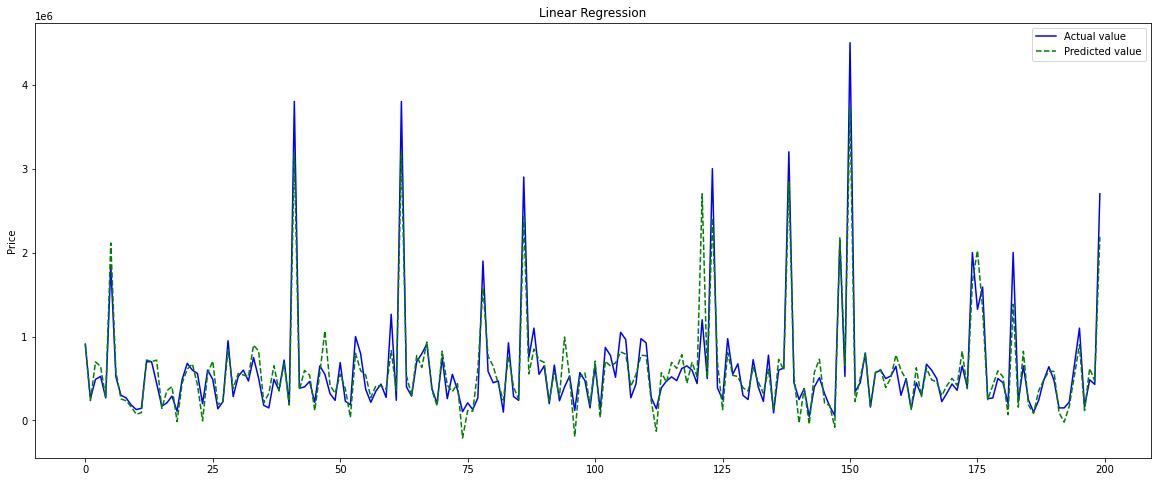

In [127]:
plot_results_graph('Linear Regression', y_test, y_pred, 200)

Looking at the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) we can see that the model is not very good. The predictions are off by a high value, which is not good. The R2 score is also not the greatest, but it is still a decent model. By looking at the lines of the graph we can see the model is doing alright at predicting the lower end of the price range, but can be caught off by the higher end.